# K-Means Clustering  
Objective: Understand the K-Means algorithm, its math, and how to implement it with Python (NumPy & scikit-learn).


K-Means is an **unsupervised** learning algorithm that groups data into *K* clusters.  
Idea:
1. Choose K cluster centers (centroids).
2. Assign each data point to the nearest centroid.
3. Move centroids to the mean of their assigned points.
4. Repeat until centroids stop moving (convergence).

Use-cases: customer segmentation, image compression, document clustering, etc.


Given data points \(x_1,\dots,x_n\) and clusters \(C_1,\dots,C_k\),  
K-Means minimizes the *Within-Cluster Sum of Squares* (WCSS):

\[
\underset{C}{\operatorname{argmin}}\ \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
\]

where \(\mu_i\) is the mean of points in cluster \(C_i\).


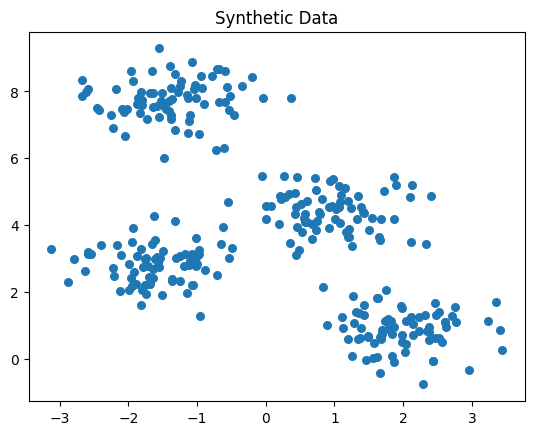

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=30)
plt.title("Synthetic Data")
plt.show()


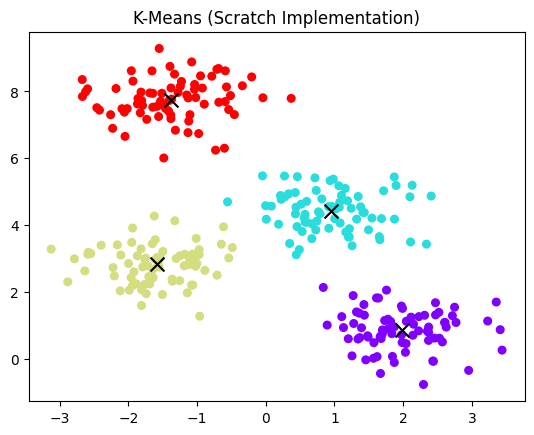

In [2]:
def kmeans(X, k, max_iters=100):
    # 1. Randomly choose k points as initial centroids
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        # 2. Assign each point to nearest centroid
        labels = np.argmin(
            np.linalg.norm(X[:, None] - centroids[None, :], axis=2),
            axis=1
        )
        # 3. Compute new centroids
        new_centroids = np.array(
            [X[labels == i].mean(axis=0) for i in range(k)]
        )
        # Stop if centroids don't change
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

centroids, labels = kmeans(X, k=4)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=30)
plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='x', s=100)
plt.title("K-Means (Scratch Implementation)")
plt.show()


Centroids:
 [[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


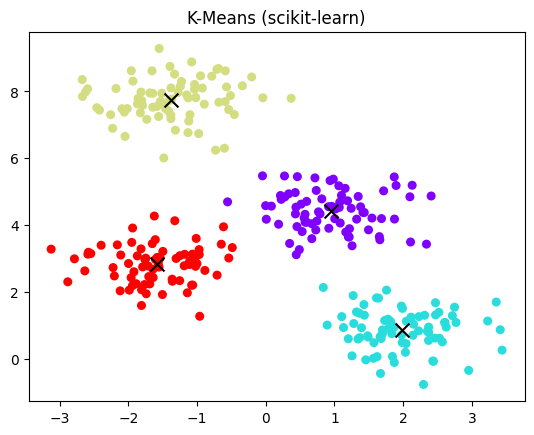

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(X)
print("Centroids:\n", kmeans.cluster_centers_)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', marker='x', s=100)
plt.title("K-Means (scikit-learn)")
plt.show()


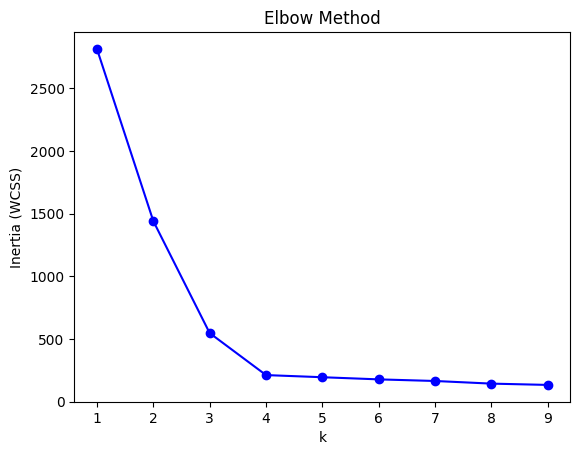

In [4]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit(X)
    inertias.append(km.inertia_)  # WCSS

plt.plot(K_range, inertias, 'bo-')
plt.xlabel("k")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()


* Sensitive to initialization (use k-means++)  
* Requires K to be specified  
* Struggles with non-spherical clusters or very different cluster sizes  
* Scale features before clustering (StandardScaler)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [7]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


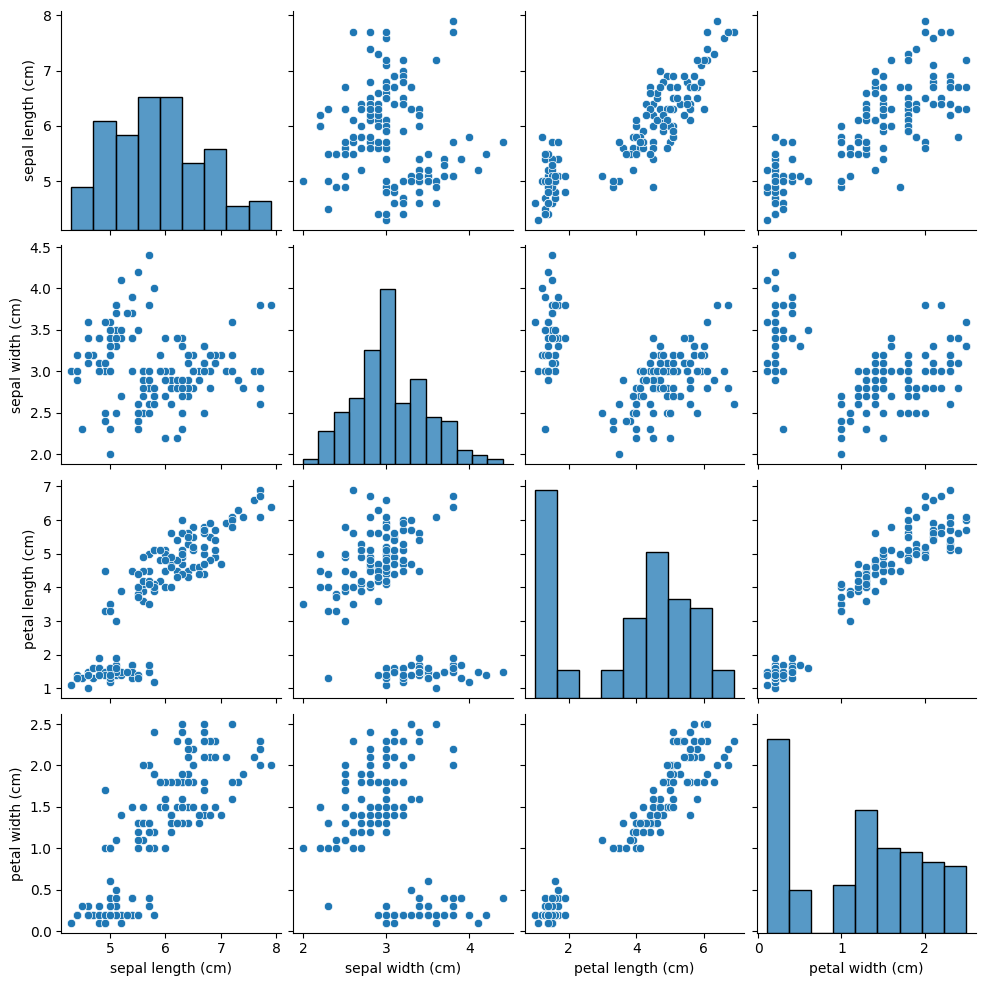

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
sns.pairplot(pd.DataFrame(X, columns=X.columns))
plt.show()

print(X.describe())


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


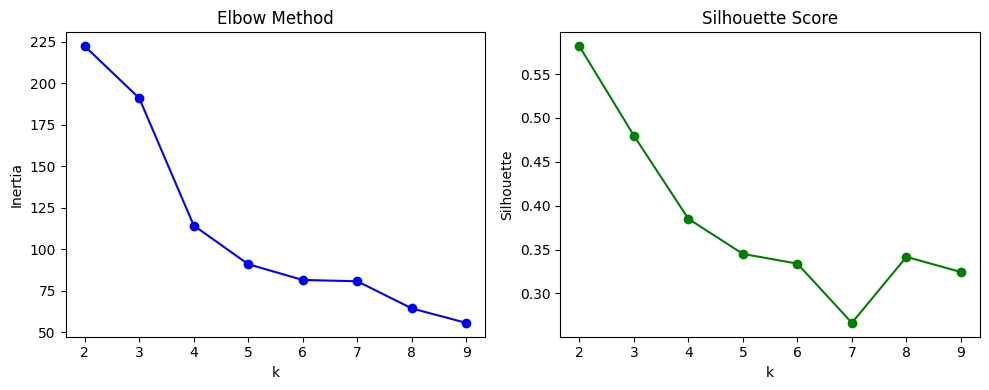

In [10]:
inertias, silhouettes = [], []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K_range, silhouettes, 'go-')
plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Silhouette Score')
plt.tight_layout()
plt.show()


In [11]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to a DataFrame for easy analysis
df = X.copy()
df['Cluster'] = labels
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1


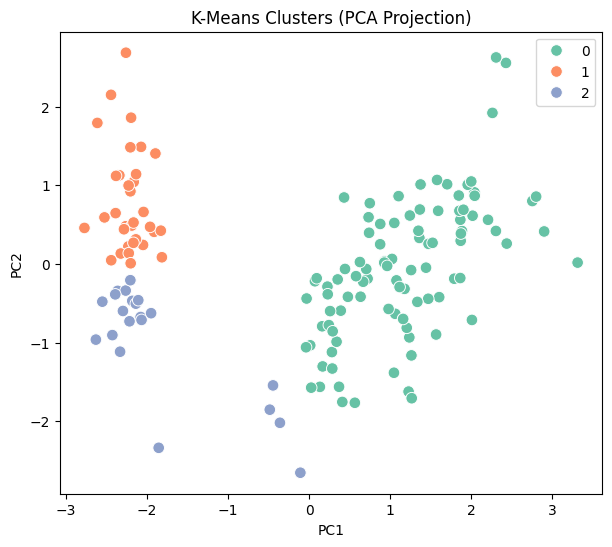

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,
                palette='Set2', s=70)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


In [13]:
from sklearn.metrics import adjusted_rand_score

print("Adjusted Rand Index:",
      adjusted_rand_score(iris.target, labels))


Adjusted Rand Index: 0.432804702527474


In [14]:
print(df.groupby('Cluster').mean().round(2))


         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                     6.31              2.90               4.97   
1                     5.17              3.63               1.49   
2                     4.75              2.90               1.76   

         petal width (cm)  
Cluster                    
0                    1.70  
1                    0.27  
2                    0.35  
